In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import catboost as cb
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("hybrid_data_1.csv")

In [3]:
df.head()

,material type,SA,TPV,C,H,N,O,T,P,CO2
0,Microporous,976.0,1.07,40.18,4.46,42.16,5.25,0,1.0,4.295
1,Microporous,976.0,1.07,40.18,4.46,42.16,5.25,25,1.0,2.795
2,Microporous,807.0,NaN,NaN,NaN,NaN,NaN,0,1.0,3.000
3,Microporous,513.0,NaN,NaN,NaN,NaN,NaN,0,1.0,2.159
4,Hierarchical,870.0,0.83,64.38,4.17,9.79,NaN,0,1.0,3.363


In [4]:
dummies = pd.get_dummies(df['material type'],prefix='type')

In [5]:
list(dummies.columns)

['type_Hierarchical',
 'type_Macroporous',
 'type_Mesoporous',
 'type_Microporous']

In [6]:
df[list(dummies.columns)] = dummies

In [7]:
list(df.columns)

['material type',
 'SA',
 'TPV',
 'C',
 'H',
 'N',
 'O',
 'T',
 'P',
 'CO2',
 'type_Hierarchical',
 'type_Macroporous',
 'type_Mesoporous',
 'type_Microporous']

In [8]:
l = [
 'type_Hierarchical',
 'type_Macroporous',
 'type_Mesoporous',
 'type_Microporous',
 'SA',
 'TPV',
 'C',
 'H',
 'N',
 'O',
 'T',
 'P',
 'CO2']

In [9]:
df = df[l]

In [10]:
df.head()

,type_Hierarchical,type_Macroporous,type_Mesoporous,type_Microporous,SA,TPV,C,H,N,O,T,P,CO2
0,0,0,0,1,976.0,1.07,40.18,4.46,42.16,5.25,0,1.0,4.295
1,0,0,0,1,976.0,1.07,40.18,4.46,42.16,5.25,25,1.0,2.795
2,0,0,0,1,807.0,NaN,NaN,NaN,NaN,NaN,0,1.0,3.000
3,0,0,0,1,513.0,NaN,NaN,NaN,NaN,NaN,0,1.0,2.159
4,1,0,0,0,870.0,0.83,64.38,4.17,9.79,NaN,0,1.0,3.363


In [76]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.CO2, test_size = 0.2,random_state=0)

In [12]:
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_KNN",KNNImputer(n_neighbors=10)),
        ("standard_scaler",StandardScaler()),
    ]
)

preprocessing = ColumnTransformer([
    ('catergorical',numeric_preprocessor,['SA', 'TPV', 'C', 'H', 'N', 'O', 'T', 'P']),
])

In [13]:
#indepth catboost

pipe = Pipeline(
steps=[
    ("preprocessor",preprocessing),
    ("regressor",cb.CatBoostRegressor(loss_function='RMSE'))
])

pipe.fit(X_train,y_train)

Learning rate set to 0.032232
0:	learn: 1.6432161	total: 161ms	remaining: 2m 41s
1:	learn: 1.6188430	total: 164ms	remaining: 1m 21s
2:	learn: 1.5992570	total: 166ms	remaining: 55.2s
3:	learn: 1.5766099	total: 168ms	remaining: 41.9s
4:	learn: 1.5568269	total: 170ms	remaining: 33.9s
5:	learn: 1.5369055	total: 173ms	remaining: 28.6s
6:	learn: 1.5162344	total: 175ms	remaining: 24.8s
7:	learn: 1.4959476	total: 184ms	remaining: 22.8s
8:	learn: 1.4750989	total: 187ms	remaining: 20.6s
9:	learn: 1.4580925	total: 189ms	remaining: 18.7s
10:	learn: 1.4434661	total: 192ms	remaining: 17.3s
11:	learn: 1.4273984	total: 195ms	remaining: 16s
12:	learn: 1.4101414	total: 197ms	remaining: 15s
13:	learn: 1.3935023	total: 199ms	remaining: 14s
14:	learn: 1.3749243	total: 202ms	remaining: 13.3s
15:	learn: 1.3561701	total: 204ms	remaining: 12.6s
16:	learn: 1.3409326	total: 206ms	remaining: 11.9s
17:	learn: 1.3259728	total: 208ms	remaining: 11.4s
18:	learn: 1.3101700	total: 210ms	remaining: 10.8s
19:	learn: 1.29

232:	learn: 0.4961858	total: 364ms	remaining: 1.2s
233:	learn: 0.4950762	total: 365ms	remaining: 1.19s
234:	learn: 0.4944465	total: 365ms	remaining: 1.19s
235:	learn: 0.4916430	total: 366ms	remaining: 1.19s
236:	learn: 0.4898928	total: 367ms	remaining: 1.18s
237:	learn: 0.4893523	total: 368ms	remaining: 1.18s
238:	learn: 0.4887729	total: 369ms	remaining: 1.17s
239:	learn: 0.4879868	total: 370ms	remaining: 1.17s
240:	learn: 0.4865789	total: 370ms	remaining: 1.17s
241:	learn: 0.4842262	total: 371ms	remaining: 1.16s
242:	learn: 0.4819029	total: 372ms	remaining: 1.16s
243:	learn: 0.4814155	total: 372ms	remaining: 1.15s
244:	learn: 0.4800493	total: 373ms	remaining: 1.15s
245:	learn: 0.4793492	total: 374ms	remaining: 1.15s
246:	learn: 0.4790892	total: 374ms	remaining: 1.14s
247:	learn: 0.4786269	total: 375ms	remaining: 1.14s
248:	learn: 0.4783637	total: 375ms	remaining: 1.13s
249:	learn: 0.4775389	total: 376ms	remaining: 1.13s
250:	learn: 0.4766617	total: 377ms	remaining: 1.12s
251:	learn: 0

445:	learn: 0.2668035	total: 531ms	remaining: 659ms
446:	learn: 0.2666672	total: 532ms	remaining: 658ms
447:	learn: 0.2660023	total: 534ms	remaining: 657ms
448:	learn: 0.2651611	total: 535ms	remaining: 656ms
449:	learn: 0.2643652	total: 536ms	remaining: 655ms
450:	learn: 0.2642018	total: 537ms	remaining: 653ms
451:	learn: 0.2637698	total: 538ms	remaining: 652ms
452:	learn: 0.2626794	total: 538ms	remaining: 650ms
453:	learn: 0.2615900	total: 539ms	remaining: 648ms
454:	learn: 0.2602262	total: 540ms	remaining: 646ms
455:	learn: 0.2598315	total: 540ms	remaining: 645ms
456:	learn: 0.2585266	total: 541ms	remaining: 643ms
457:	learn: 0.2584034	total: 542ms	remaining: 641ms
458:	learn: 0.2573584	total: 543ms	remaining: 640ms
459:	learn: 0.2572857	total: 544ms	remaining: 638ms
460:	learn: 0.2562797	total: 544ms	remaining: 637ms
461:	learn: 0.2555806	total: 545ms	remaining: 635ms
462:	learn: 0.2545441	total: 546ms	remaining: 633ms
463:	learn: 0.2540556	total: 547ms	remaining: 632ms
464:	learn: 

644:	learn: 0.1756147	total: 703ms	remaining: 387ms
645:	learn: 0.1755038	total: 704ms	remaining: 386ms
646:	learn: 0.1752108	total: 705ms	remaining: 385ms
647:	learn: 0.1748162	total: 706ms	remaining: 384ms
648:	learn: 0.1744654	total: 707ms	remaining: 382ms
649:	learn: 0.1744166	total: 708ms	remaining: 381ms
650:	learn: 0.1743038	total: 709ms	remaining: 380ms
651:	learn: 0.1740316	total: 709ms	remaining: 379ms
652:	learn: 0.1736937	total: 710ms	remaining: 377ms
653:	learn: 0.1730238	total: 711ms	remaining: 376ms
654:	learn: 0.1729197	total: 711ms	remaining: 375ms
655:	learn: 0.1724023	total: 712ms	remaining: 373ms
656:	learn: 0.1720533	total: 713ms	remaining: 372ms
657:	learn: 0.1718230	total: 715ms	remaining: 372ms
658:	learn: 0.1713472	total: 716ms	remaining: 370ms
659:	learn: 0.1712086	total: 717ms	remaining: 369ms
660:	learn: 0.1711075	total: 718ms	remaining: 368ms
661:	learn: 0.1710082	total: 719ms	remaining: 367ms
662:	learn: 0.1709002	total: 719ms	remaining: 366ms
663:	learn: 

831:	learn: 0.1281865	total: 877ms	remaining: 177ms
832:	learn: 0.1276850	total: 878ms	remaining: 176ms
833:	learn: 0.1274480	total: 879ms	remaining: 175ms
834:	learn: 0.1274002	total: 880ms	remaining: 174ms
835:	learn: 0.1272083	total: 881ms	remaining: 173ms
836:	learn: 0.1271753	total: 883ms	remaining: 172ms
837:	learn: 0.1270401	total: 884ms	remaining: 171ms
838:	learn: 0.1268104	total: 884ms	remaining: 170ms
839:	learn: 0.1265267	total: 885ms	remaining: 169ms
840:	learn: 0.1264736	total: 886ms	remaining: 168ms
841:	learn: 0.1260787	total: 887ms	remaining: 166ms
842:	learn: 0.1256634	total: 888ms	remaining: 165ms
843:	learn: 0.1252955	total: 889ms	remaining: 164ms
844:	learn: 0.1252265	total: 890ms	remaining: 163ms
845:	learn: 0.1251370	total: 890ms	remaining: 162ms
846:	learn: 0.1250218	total: 891ms	remaining: 161ms
847:	learn: 0.1249078	total: 892ms	remaining: 160ms
848:	learn: 0.1246027	total: 893ms	remaining: 159ms
849:	learn: 0.1243451	total: 894ms	remaining: 158ms
850:	learn: 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('catergorical',
                                                  Pipeline(steps=[('imputation_KNN',
                                                                   KNNImputer(n_neighbors=10)),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['SA', 'TPV', 'C', 'H', 'N',
                                                   'O', 'T', 'P'])])),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x000001C03535D7D0>)])

In [14]:
r2_score(y_train,pipe.predict(X_train))

0.9964981517430637

In [15]:
r2_score(y_test,pipe.predict(X_test))

0.8765235250588888

In [16]:
param_grid_cat = {
    'regressor__n_estimators':[int(x) for x in np.linspace(start=100,stop=1000,num=10)],
    'regressor__learning_rate': [0.1,0.01,0.001],
    'regressor__l2_leaf_reg':[None]+[1,3,5]
}
search_1 = GridSearchCV(pipe,param_grid= param_grid_cat, n_jobs=-1)

search_1.fit(X_train,y_train)

0:	learn: 1.5717928	total: 1.13ms	remaining: 338ms
1:	learn: 1.5011042	total: 2.16ms	remaining: 323ms
2:	learn: 1.4396693	total: 3ms	remaining: 297ms
3:	learn: 1.3668697	total: 3.85ms	remaining: 285ms
4:	learn: 1.3152462	total: 4.53ms	remaining: 267ms
5:	learn: 1.2631434	total: 5.28ms	remaining: 259ms
6:	learn: 1.2041399	total: 6.03ms	remaining: 252ms
7:	learn: 1.1693996	total: 6.93ms	remaining: 253ms
8:	learn: 1.1257657	total: 7.78ms	remaining: 252ms
9:	learn: 1.0820749	total: 8.65ms	remaining: 251ms
10:	learn: 1.0579190	total: 9.51ms	remaining: 250ms
11:	learn: 1.0315171	total: 10.3ms	remaining: 248ms
12:	learn: 1.0092617	total: 11.1ms	remaining: 245ms
13:	learn: 0.9817659	total: 11.9ms	remaining: 244ms
14:	learn: 0.9615085	total: 12.7ms	remaining: 242ms
15:	learn: 0.9306530	total: 13.5ms	remaining: 239ms
16:	learn: 0.9048250	total: 14.4ms	remaining: 239ms
17:	learn: 0.8871168	total: 15.5ms	remaining: 243ms
18:	learn: 0.8689456	total: 16.4ms	remaining: 243ms
19:	learn: 0.8550191	tota

199:	learn: 0.1122808	total: 176ms	remaining: 88.1ms
200:	learn: 0.1119106	total: 177ms	remaining: 87.2ms
201:	learn: 0.1108158	total: 178ms	remaining: 86.3ms
202:	learn: 0.1100562	total: 179ms	remaining: 85.3ms
203:	learn: 0.1091899	total: 179ms	remaining: 84.4ms
204:	learn: 0.1085331	total: 180ms	remaining: 83.4ms
205:	learn: 0.1072722	total: 181ms	remaining: 82.5ms
206:	learn: 0.1063362	total: 182ms	remaining: 81.6ms
207:	learn: 0.1049796	total: 182ms	remaining: 80.6ms
208:	learn: 0.1037145	total: 183ms	remaining: 79.7ms
209:	learn: 0.1034144	total: 184ms	remaining: 78.8ms
210:	learn: 0.1031924	total: 185ms	remaining: 77.9ms
211:	learn: 0.1028077	total: 185ms	remaining: 76.9ms
212:	learn: 0.1022390	total: 186ms	remaining: 76ms
213:	learn: 0.1019624	total: 187ms	remaining: 75.1ms
214:	learn: 0.1008335	total: 188ms	remaining: 74.2ms
215:	learn: 0.1005083	total: 189ms	remaining: 73.3ms
216:	learn: 0.1001069	total: 189ms	remaining: 72.4ms
217:	learn: 0.0991926	total: 190ms	remaining: 71

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('catergorical',
                                                                         Pipeline(steps=[('imputation_KNN',
                                                                                          KNNImputer(n_neighbors=10)),
                                                                                         ('standard_scaler',
                                                                                          StandardScaler())]),
                                                                         ['SA',
                                                                          'TPV',
                                                                          'C',
                                                                          'H',
                                                                          'N',
                                                                          'O',
                                                                          'T',
                                                                          'P'])])),
                                       ('regressor',
                                        <catboost.core.CatBoostRegressor object at 0x000001C03535D7D0>)]),
             n_jobs=-1,
             param_grid={'regressor__l2_leaf_reg': [None, 1, 3, 5],
                         'regressor__learning_rate': [0.1, 0.01, 0.001],
                         'regressor__n_estimators': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900,
                                                     1000]})

In [17]:
search_1.best_params_

{'regressor__l2_leaf_reg': 1,
 'regressor__learning_rate': 0.1,
 'regressor__n_estimators': 300}

In [18]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('catergorical',
                                                  Pipeline(steps=[('imputation_KNN',
                                                                   KNNImputer(n_neighbors=10)),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['SA', 'TPV', 'C', 'H', 'N',
                                                   'O', 'T', 'P'])])),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x000001C03535D7D0>)])

In [19]:
r2_score(y_train,search_1.predict(X_train))

0.9985929268049822

In [20]:
r2_score(y_test,search_1.predict(X_test))

0.883424787277288

In [31]:
search_1.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('catergorical',
                                                  Pipeline(steps=[('imputation_KNN',
                                                                   KNNImputer(n_neighbors=10)),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['SA', 'TPV', 'C', 'H', 'N',
                                                   'O', 'T', 'P'])])),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x000001C03541CF50>)])

In [21]:
#indepth lgbm
pipe_2 = Pipeline(
steps=[
    ('preprocessor',preprocessing),
    ('regressor',LGBMRegressor())
])
param_grid_lgbm = {
    'regressor__n_estimators':[int(x) for x in np.linspace(start=100,stop=1000,num=10)],
    'regressor__learning_rate': [0.1,0.01,0.001],
    'regressor__max_depth': [int(x) for x in np.linspace(start=3,stop=5,num=1)]
}

search_2 = GridSearchCV(pipe_2,param_grid=param_grid_lgbm,n_jobs=-1)

search_2.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 220, number of used features: 8
[LightGBM] [Info] Start training from score 3.018141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('catergorical',
                                                                         Pipeline(steps=[('imputation_KNN',
                                                                                          KNNImputer(n_neighbors=10)),
                                                                                         ('standard_scaler',
                                                                                          StandardScaler())]),
                                                                         ['SA',
                                                                          'TPV',
                                                                          'C',
                                                                          'H',
                                                                          'N',
                                                                          'O',
                                                                          'T',
                                                                          'P'])])),
                                       ('regressor', LGBMRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.1, 0.01, 0.001],
                         'regressor__max_depth': [3],
                         'regressor__n_estimators': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900,
                                                     1000]})

In [22]:
r2_score(y_train,search_2.predict(X_train))

0.9901794512856935

In [23]:
r2_score(y_test,search_2.predict(X_test))

0.8746760953416411

In [24]:
search_2.best_params_

{'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__n_estimators': 1000}

In [66]:
##indepth XGB
param_grid_xgb = {
    "regressor__learning_rate":[0.1, 0.01, 0.001],
    "regressor__max_depth":[int(x) for x in np.linspace(start=3,stop=5,num=1)],
    "regressor__n_estimators":[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
                               }

pipe_3 = Pipeline(
steps=[
    ('preprocessor',preprocessing),
    ('regressor',XGBRegressor())
])

search_3 = GridSearchCV(pipe_3,param_grid=param_grid_xgb,n_jobs=-1)

search_3.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('catergorical',
                                                                         Pipeline(steps=[('imputation_KNN',
                                                                                          KNNImputer(n_neighbors=10)),
                                                                                         ('standard_scaler',
                                                                                          StandardScaler())]),
                                                                         ['SA',
                                                                          'TPV',
                                                                          'C',
                                                                          'H',
                                                                          'N',
                                                                          'O',
                                                                          'T',
                                                                          'P'])])),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_by...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.1, 0.01, 0.001],
                         'regressor__max_depth': [3],
                         'regressor__n_estimators': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900,
                                                     1000]})

In [67]:
r2_score(y_train,search_3.predict(X_train))

0.9990585154749562

In [68]:
r2_score(y_test,search_3.predict(X_test))

0.8298734738969664

In [69]:
search_3.best_params_

{'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__n_estimators': 1000}

In [70]:
actual_data = df.CO2
predicted_train_data = search_1.predict(X_train)
predicted_test_data = search_1.predict(X_test)

In [71]:
predicted_train_data.size

247

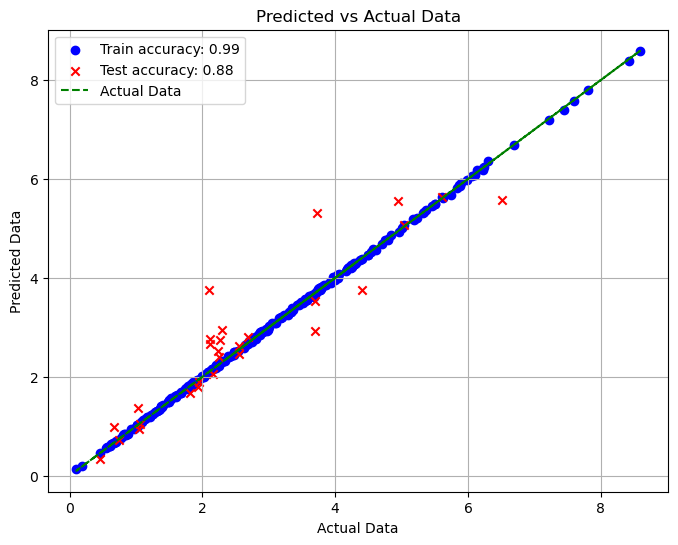

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predicted_train_data, color='blue', label='Train accuracy: 0.99', marker='o')
plt.scatter(y_test, predicted_test_data, color='red', label='Test accuracy: 0.88', marker='x')
plt.plot(actual_data, actual_data, color='green', linestyle='--', label='Actual Data')

plt.title('Predicted vs Actual Data')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.savefig('plot.png')
plt.show()

In [74]:
final_pipeline = Pipeline(steps = [("preprocessor",preprocessing)] + [('model',search_1)])

In [75]:
import joblib

In [76]:
joblib.dump(final_pipeline,'final_pipeline.joblib')

['final_pipeline.joblib']

In [77]:
#LGBM
predicted_train_data = search_2.predict(X_train)
predicted_test_data = search_2.predict(X_test)

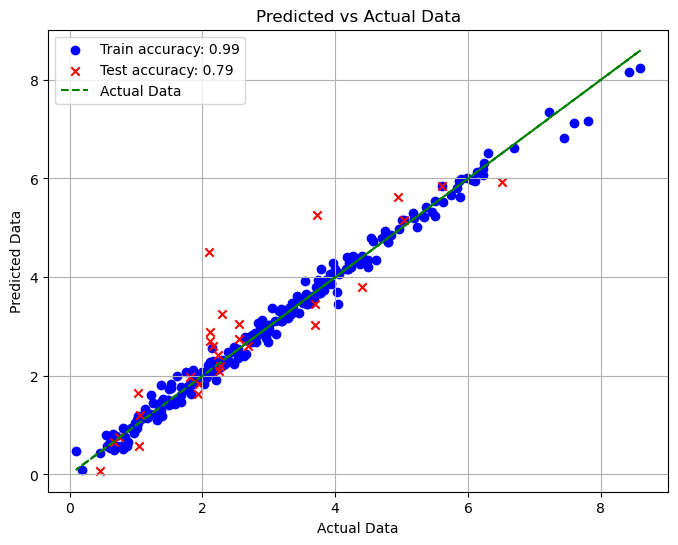

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predicted_train_data, color='blue', label='Train accuracy: 0.99', marker='o')
plt.scatter(y_test, predicted_test_data, color='red', label='Test accuracy: 0.79', marker='x')
plt.plot(actual_data, actual_data, color='green', linestyle='--', label='Actual Data')

plt.title('Predicted vs Actual Data')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.savefig('lgbm_plot.png')
plt.show()

In [81]:
#XGB
predicted_train_data = search_3.predict(X_train)
predicted_test_data = search_3.predict(X_test)

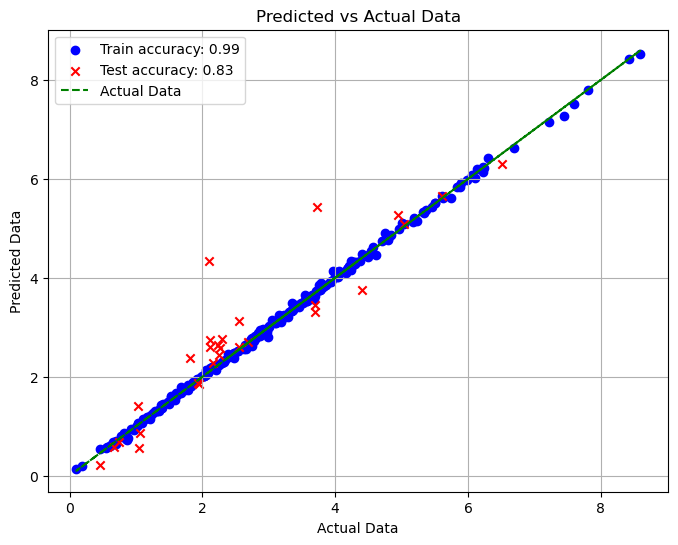

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predicted_train_data, color='blue', label='Train accuracy: 0.99', marker='o')
plt.scatter(y_test, predicted_test_data, color='red', label='Test accuracy: 0.83', marker='x')
plt.plot(actual_data, actual_data, color='green', linestyle='--', label='Actual Data')

plt.title('Predicted vs Actual Data')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.savefig('XGB_plot.png')
plt.show()

In [83]:
rf = joblib.load("rf_model.joblib")

In [86]:
rf

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['material '
                                                                          'type']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('imputation_KNN',
                                                                                          KNNImputer(n_neighbors=10)),
                                                                                         ('standard_scaler',
                                                                                          StandardScaler())]),
                                                                         ['SA',
                                                                          'TPV',
                                                                          'C',
                                                                          'H',
                                                                          'N',
                                                                          'O',
                                                                          'T',
                                                                          'P'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_features': ['sqrt', 'log2', None],
                         'regressor__min_samples_split': [0, 2, 4, 6, 8],
                         'regressor__n_estimators': [0, 100, 200, 300, 400, 500,
                                                     600, 700, 800, 900]})

In [89]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

def evaluate_model(model):
    # Make predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Calculate metrics
    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)
    
    mse_train = mean_squared_error(y_train, train_preds)
    mse_test = mean_squared_error(y_test, test_preds)
    
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    mape_train = mean_absolute_percentage_error(y_train, train_preds)
    mape_test = mean_absolute_percentage_error(y_test, test_preds)
    
    return [r2_train, r2_test, mse_train, mse_test, rmse_train, rmse_test, mape_train, mape_test]

# Assuming you have a list of trained models and the same X_train and X_test data for all models
# Replace these with your actual models and data

models = [search_1,search_2,search_3]  # Replace with your trained models

# Metrics and columns for the table
metrics = ['R2 (Train)', 'R2 (Test)', 'MSE (Train)', 'MSE (Test)', 'RMSE (Train)', 'RMSE (Test)', 'MAPE (Train)', 'MAPE (Test)']
columns = ['Model'] + metrics

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=columns)

# Evaluate each model and populate the results DataFrame
for i, model in enumerate(models):
    model_name = f"Model {i+1}"  # Generating model names
    
    evaluation = evaluate_model(model)
    model_results = [model_name] + evaluation
    
    results_df.loc[i] = model_results

print(results_df)


     Model  R2 (Train)  R2 (Test)  MSE (Train)  MSE (Test)  RMSE (Train)  \
0  Model 1    0.999835   0.855396     0.000462    0.333507      0.021490   
1  Model 2    0.990145   0.794797     0.027512    0.473271      0.165866   
2  Model 3    0.999059   0.829873     0.002628    0.392371      0.051268   

   RMSE (Test)  MAPE (Train)  MAPE (Test)  
0     0.577501      0.009145     0.168161  
1     0.687947      0.074312     0.228258  
2     0.626396      0.015942     0.198459  


In [90]:
results_df

,Model,R2 (Train),R2 (Test),MSE (Train),MSE (Test),RMSE (Train),RMSE (Test),MAPE (Train),MAPE (Test)
0,Model 1,0.999835,0.855396,0.000462,0.333507,0.021490,0.577501,0.009145,0.168161
1,Model 2,0.990145,0.794797,0.027512,0.473271,0.165866,0.687947,0.074312,0.228258
2,Model 3,0.999059,0.829873,0.002628,0.392371,0.051268,0.626396,0.015942,0.198459


## SHAP explanation of model

In [25]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/e5/4c/a4785425971e7433a7d80fa0ff9cd9f5f35303d4e99446190d91c72648c9/shap-0.44.0-cp311-cp311-win_amd64.whl.metadata
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
   ---------------------------------------- 0.0/448.0 kB ? eta -:--:--
   ------------ --------------------------- 143.4/448.0 kB 2.8 MB/s eta 0:00:01
   ------------------------------------- -- 419.8/448.0 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 448.0/448.0 kB 3.5 MB/s eta 0:00:00


In [38]:
search_1.best_params_

{'regressor__l2_leaf_reg': 1,
 'regressor__learning_rate': 0.1,
 'regressor__n_estimators': 300}

In [39]:
model = cb.CatBoostRegressor(loss_function='RMSE',l2_leaf_reg=1,learning_rate=0.1,n_estimators=300)

In [55]:
# KNN Imputation n=10
imputer = KNNImputer(n_neighbors=10)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train))
X_test_imputed = pd.DataFrame(imputer.transform(X_test))
X_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       55 non-null     float64
 1   1       55 non-null     float64
 2   2       55 non-null     float64
 3   3       55 non-null     float64
 4   4       55 non-null     float64
 5   5       55 non-null     float64
 6   6       55 non-null     float64
 7   7       55 non-null     float64
 8   8       55 non-null     float64
 9   9       55 non-null     float64
 10  10      55 non-null     float64
 11  11      55 non-null     float64
dtypes: float64(12)
memory usage: 5.3 KB


In [134]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.CO2, test_size = 0.2,random_state=0)

In [135]:
# scaling using standard scaler
columns_to_scale = ['SA', 'TPV', 'C', 'H', 'N', 'O', 'T', 'P']
selected_columns_train = X_train[columns_to_scale]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(selected_columns_train),columns=columns_to_scale)

X_train[columns_to_scale] = X_train_scaled


In [136]:
X_train.head()

,type_Hierarchical,type_Macroporous,type_Mesoporous,type_Microporous,SA,TPV,C,H,N,O,T,P
106,0,0,0,1,0.580364,0.013308,0.814728,-0.673145,0.156228,-0.643760,0.896258,0.427345
157,0,0,0,1,-0.325715,-0.486469,0.052327,-0.234209,-0.025108,NaN,0.896258,0.427345
81,0,0,1,0,2.970339,1.921547,1.222278,-0.686446,-0.598563,-0.723625,-1.115750,-2.328293
135,0,0,0,1,0.264607,-0.236581,-0.352412,0.257932,0.070984,NaN,-1.115750,0.427345
156,0,0,0,1,0.253573,-0.314728,0.440906,-0.613290,-0.513319,0.060600,0.896258,0.427345


In [137]:
X_train_scaled.iloc[106,:]

SA     0.580364
TPV    0.013308
C      0.814728
H     -0.673145
N      0.156228
O     -0.643760
T      0.896258
P      0.427345
Name: 106, dtype: float64

In [138]:
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test.iloc[:,4:]))

In [139]:
X_test_scaled = X_test_scaled.set_index(X_test.index)

In [140]:
X_test[columns_to_scale] = X_test_scaled

In [141]:
X_test.head()

,type_Hierarchical,type_Macroporous,type_Mesoporous,type_Microporous,SA,TPV,C,H,N,O,T,P
118,0,0,0,1,-1.015847,-1.131963,-0.320604,-0.013451,1.124317,NaN,0.697486,0.381665
182,0,0,0,1,-1.300481,-1.208312,-1.137989,-0.496485,-0.524950,1.958567,-1.433721,0.381665
214,0,0,0,1,-0.002057,-0.572075,0.667485,-0.681084,-0.890524,NaN,0.697486,0.381665
153,0,0,0,1,0.700743,-0.088535,-0.160491,-0.321116,0.008062,NaN,0.697486,0.381665
209,0,0,0,1,1.127695,0.293207,0.233872,0.540345,-0.379837,NaN,0.697486,0.381665


In [142]:
# fit the model
model.fit(X_train,y_train)

0:	learn: 1.6458108	total: 967us	remaining: 289ms
1:	learn: 1.6070454	total: 1.88ms	remaining: 281ms
2:	learn: 1.5847222	total: 2.72ms	remaining: 269ms
3:	learn: 1.5666238	total: 3.49ms	remaining: 258ms
4:	learn: 1.5471173	total: 4.18ms	remaining: 247ms
5:	learn: 1.5278048	total: 4.85ms	remaining: 238ms
6:	learn: 1.5059784	total: 5.54ms	remaining: 232ms
7:	learn: 1.4899517	total: 6.2ms	remaining: 226ms
8:	learn: 1.4577607	total: 6.87ms	remaining: 222ms
9:	learn: 1.4442266	total: 7.54ms	remaining: 219ms
10:	learn: 1.4329747	total: 8.22ms	remaining: 216ms
11:	learn: 1.4211779	total: 8.96ms	remaining: 215ms
12:	learn: 1.4035300	total: 9.8ms	remaining: 216ms
13:	learn: 1.3887549	total: 10.6ms	remaining: 216ms
14:	learn: 1.3710422	total: 11.5ms	remaining: 219ms
15:	learn: 1.3563427	total: 12.3ms	remaining: 218ms
16:	learn: 1.3409487	total: 13.3ms	remaining: 222ms
17:	learn: 1.3255754	total: 14.2ms	remaining: 223ms
18:	learn: 1.3159527	total: 15ms	remaining: 222ms
19:	learn: 1.3104055	total:

273:	learn: 0.6005200	total: 177ms	remaining: 16.8ms
274:	learn: 0.6002405	total: 178ms	remaining: 16.1ms
275:	learn: 0.6001106	total: 178ms	remaining: 15.5ms
276:	learn: 0.5998873	total: 179ms	remaining: 14.8ms
277:	learn: 0.5998265	total: 179ms	remaining: 14.2ms
278:	learn: 0.5996442	total: 180ms	remaining: 13.6ms
279:	learn: 0.5994909	total: 181ms	remaining: 12.9ms
280:	learn: 0.5991889	total: 181ms	remaining: 12.3ms
281:	learn: 0.5989759	total: 182ms	remaining: 11.6ms
282:	learn: 0.5987456	total: 183ms	remaining: 11ms
283:	learn: 0.5986708	total: 183ms	remaining: 10.3ms
284:	learn: 0.5984766	total: 184ms	remaining: 9.68ms
285:	learn: 0.5983808	total: 185ms	remaining: 9.04ms
286:	learn: 0.5982317	total: 185ms	remaining: 8.39ms
287:	learn: 0.5978967	total: 186ms	remaining: 7.75ms
288:	learn: 0.5976717	total: 187ms	remaining: 7.1ms
289:	learn: 0.5975983	total: 187ms	remaining: 6.46ms
290:	learn: 0.5974649	total: 188ms	remaining: 5.81ms
291:	learn: 0.5973113	total: 189ms	remaining: 5.1

In [143]:
# get prediction
r2_score(y_train,model.predict(X_train))

0.8731093343073817

In [144]:
r2_score(y_test,model.predict(X_test))

-0.06918273801807251

In [145]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('catergorical',
                                                  Pipeline(steps=[('imputation_KNN',
                                                                   KNNImputer(n_neighbors=10)),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['SA', 'TPV', 'C', 'H', 'N',
                                                   'O', 'T', 'P'])])),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x000001C03535D7D0>)])

In [164]:
import shap

model = pipe["regressor"]

X_test_shap = pipe["preprocessor"].transform(X_test)

In [165]:
explainer = shap.Explainer(model,feature_names=processor.get_feature_names_out())

shap_values = explainer(X_test_shap)

NameError: name 'processor' is not defined

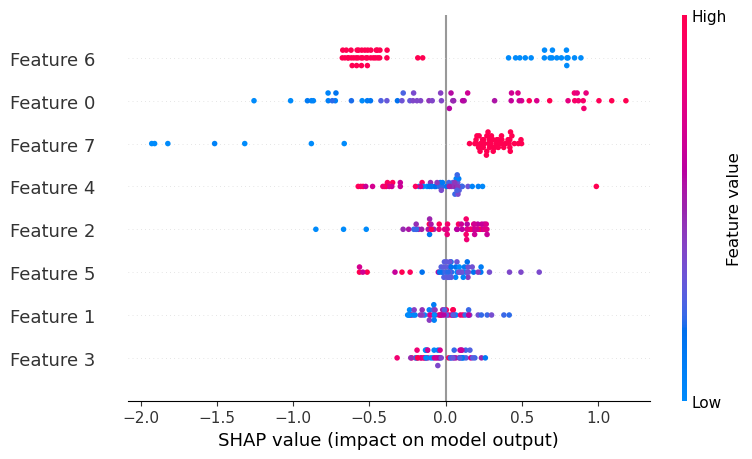

In [166]:
shap.summary_plot(shap_values)

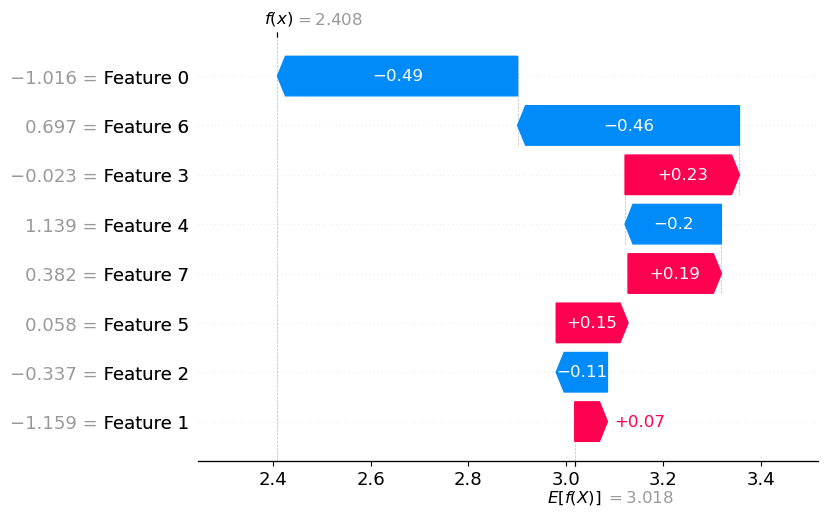

In [167]:
shap.plots.waterfall(shap_values[0])